# Routing Demo

In [5]:
import importlib
import solver.inexact_solver
import solver.exact_solver
import routing.graph_vis
importlib.reload(solver.inexact_solver)
importlib.reload(solver.exact_solver)
import numpy as np

In [17]:
distance_matrix = np.array([
    [0, 10, 5, 10, 5],
    [14, 0, 7, 20, 7],
    [10, 14, 0, 14, 10],
    [7, 20, 7, 0, 14],
    [5, 10, 5, 10, 0]
])

demands = [0, 2, 4, 3, 1]  # Demands at nodes (excluding the depot)
vehicle_capacity = 6  # Capacity of each vehicle
num_vehicles = 2  # Number of vehicles

deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    3: None,  # Node 3 has no deadline
    4: None  # Node 4 has no deadline
}

infeasible_nodes = {
    0: [1],  # Nodes that vehicle 0 cannot visit
    1: [3, 4]   # Nodes that vehicle 1 cannot visit
}


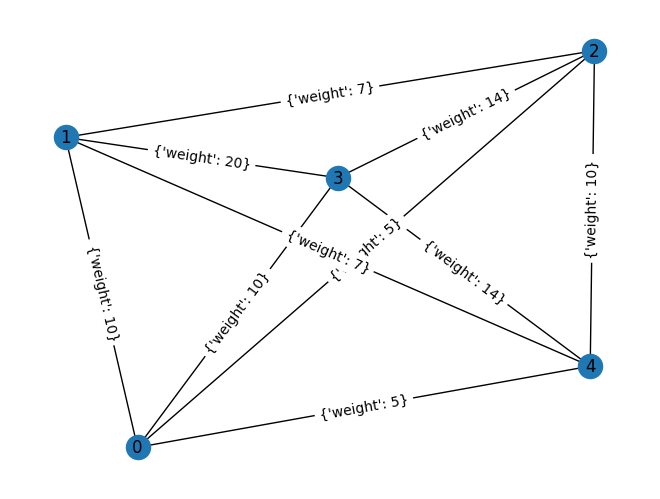

In [9]:
routing.graph_vis.visualize_graph_from_matrix(distance_matrix)

## minsum

In [20]:
deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    # 3: None,  # Node 3 has no deadline
    # 4: None  # Node 4 has no deadline
}

minsum = solver.inexact_solver.minsum_insertion_algorithm(distance_matrix, demands, vehicle_capacity, num_vehicles)
solver.inexact_solver.print_route_and_costs(distance_matrix, minsum)

Vehicle 1 - Route: [0] -> Node 1 -> Node 2 -> [0], Cost: 27
Vehicle 2 - Route: [0] -> Node 4 -> Node 3 -> [0], Cost: 22


In [21]:
deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    # 3: None,  # Node 3 has no deadline
    # 4: None  # Node 4 has no deadline
}
feasibilities = solver.inexact_solver.minsum_insertion_algorithm_feasibilities(distance_matrix, demands, vehicle_capacity, num_vehicles, infeasible_nodes)
solver.inexact_solver.print_route_and_costs(distance_matrix, feasibilities)

Vehicle 1 - Route: [0] -> Node 4 -> Node 2 -> [0], Cost: 20
Vehicle 2 - Route: [0] -> Node 1 -> [0], Cost: 24


In [23]:
deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    3: None,  # Node 3 has no deadline
    4: None  # Node 4 has no deadline
}

deadlines = solver.inexact_solver.minsum_insertion_algorithm_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines
)
solver.inexact_solver.print_route_and_costs(distance_matrix, deadlines[0])

Vehicle 1 - Route: [0] -> Node 3 -> Node 4 -> [0], Cost: 29
Vehicle 2 - Route: [0] -> Node 1 -> Node 2 -> [0], Cost: 27


In [26]:
deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    3: None,  # Node 3 has no deadline
    4: None  # Node 4 has no deadline
}
feasibilities_deadlines = solver.inexact_solver.minsum_insertion_algorithm_feasibilities_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines, infeasible_nodes
)
solver.inexact_solver.print_route_and_costs(distance_matrix, feasibilities_deadlines[0])

Vehicle 1 - Route: [0] -> Node 3 -> Node 4 -> [0], Cost: 29
Vehicle 2 - Route: [0] -> Node 1 -> Node 2 -> [0], Cost: 27


## minmax

In [35]:
deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    3: None,  # Node 3 has no deadline
    4: None  # Node 4 has no deadline
}

minmax = solver.inexact_solver.minmax_insertion_algorithm(distance_matrix, demands, vehicle_capacity, num_vehicles)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax)

Vehicle 1 - Route: [0] -> Node 1 -> Node 2 -> [0], Cost: 27
Vehicle 2 - Route: [0] -> Node 4 -> Node 3 -> [0], Cost: 22


In [34]:
deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    3: None,  # Node 3 has no deadline
    4: None  # Node 4 has no deadline
}

minmax_feasibilities = solver.inexact_solver.minmax_insertion_algorithm_feasibilities(distance_matrix, demands, vehicle_capacity, num_vehicles, infeasible_nodes)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_feasibilities)

Vehicle 1 - Route: [0] -> Node 4 -> Node 2 -> [0], Cost: 20
Vehicle 2 - Route: [0] -> Node 1 -> Node 3 -> [0], Cost: 37


In [33]:
deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    3: None,  # Node 3 has no deadline
    4: None  # Node 4 has no deadline
}
minmax_deadlines = solver.inexact_solver.minmax_insertion_algorithm_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines
)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_deadlines)

Vehicle 1 - Route: [0] -> Node 2 -> [0], Cost: 15
Vehicle 2 - Route: [0] -> Node 1 -> Node 4 -> Node 3 -> [0], Cost: 34


In [32]:
deadlines = {
    1: 20,  # Deadline for node 1 (to be visited before the cost reaches 4)
    2: 18,  # Deadline for node 2 (to be visited before the cost reaches 10)
    # 3: None,  # Node 3 has no deadline
    # 4: None  # Node 4 has no deadline
}

minmax_feasibilities_deadlines = solver.inexact_solver.minmax_insertion_algorithm_feasibilities_deadlines(
    distance_matrix, demands, vehicle_capacity, num_vehicles, deadlines, infeasible_nodes
)
solver.inexact_solver.print_route_and_costs(distance_matrix, minmax_feasibilities_deadlines)

Vehicle 1 - Route: [0] -> Node 4 -> Node 2 -> [0], Cost: 20
Vehicle 2 - Route: [0] -> Node 1 -> [0], Cost: 24


## Exact Implementation of the MinMax VRP

In [36]:
minmax_gurobi = solver.exact_solver.solve_minmax_vrp(distance_matrix, vehicle_capacity, num_vehicles)
solver.exact_solver.print_route_and_costs(distance_matrix, minmax_gurobi)

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (mac64[arm])

CPU model: Apple M1 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 9 rows, 11 columns and 32 nonzeros
Model fingerprint: 0x08602304
Variable types: 1 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
Presolve removed 7 rows and 8 columns
Presolve time: 0.00s
Presolved: 2 rows, 3 columns, 6 nonzeros
Variable types: 0 continuous, 3 integer (0 binary)
Found heuristic solution: objective 198.0000000
Found heuristic solution: objective 138.0000000
Found heuristic solution: objective 108.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 10 (of 10 available processors)

Solution count 3: 108 138 198 

Optimal sol

# Real-World Example of MinMax and MinSum 

In [50]:
import importlib
import routing.distancial
import routing.directional
importlib.reload(routing.distancial)
importlib.reload(routing.directional)

<module 'routing.directional' from '/Users/marv/Documents/uni/bua/relief-routing-models/routing/directional.py'>

In [93]:
coordinates = [[13.384116, 52.533558], [13.41774, 52.498929], [13.428726, 52.519355], [13.374825, 52.496369], [13.254825, 52.716369]]
index_list = [0,1,2,3,4,5]

In [94]:
route_list = []
matrix, route_summary_dict_list, route_summary_df_list = routing.distancial.route_distancial_with_ors(coordinates_list=coordinates)

In [95]:
matrix['distances']

[[0.0, 7883.21, 4043.09, 5454.34, 30561.03],
 [7753.46, 0.0, 3035.88, 4005.74, 33913.68],
 [3924.85, 2960.72, 0.0, 6233.13, 30821.66],
 [5195.92, 3753.14, 5951.89, 0.0, 35460.72],
 [30918.17, 33626.83, 31620.65, 36076.29, 0.0]]

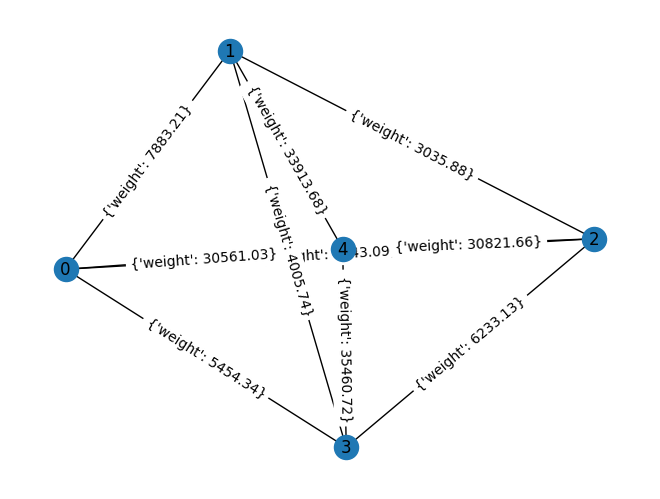

In [116]:
routing.graph_vis.visualize_graph_from_matrix(matrix['distances'])

In [96]:
adjacency_matrix = [
    [0.0, 7883.21, 4043.09, 111676.41, 123862.46],
    [7753.46, 0.0, 3035.88, 108096.06, 130861.09],
    [3924.85, 2960.72, 0.0, 110323.45, 124123.09],
    [110753.45, 107167.81, 109366.56, 0.0, 222791.2],
    [123759.98, 130693.3, 124462.45, 223134.55, 0.0],
    [0.0, 7883.21, 4043.09, 111676.41, 123862.46]]

In [97]:
minsum_real_world = solver.inexact_solver.minsum_insertion_algorithm(matrix['distances'], demands, vehicle_capacity, 2)
solver.inexact_solver.print_route_and_costs(distance_matrix, minsum_real_world)

Vehicle 1 - Route: [0] -> Node 2 -> Node 1 -> [0], Cost: 33
Vehicle 2 - Route: [0] -> Node 3 -> Node 4 -> [0], Cost: 29


In [98]:
route_list, route_sum_df = routing.directional.route_directional_as_round_trip( coordinates= coordinates, indices= [0,2,1,0], profile='driving-hgv')

	node 0: [13.384116, 52.533558] 	| node 2: [13.41774, 52.498929]
	node 2: [13.41774, 52.498929] 	| node 1: [13.428726, 52.519355]
	node 1: [13.428726, 52.519355] 	| node 0: [13.374825, 52.496369]


In [99]:
route_list_2, route_sum_df_2 = routing.directional.route_directional_as_round_trip( coordinates= coordinates, indices= [0,4, 3,0], profile='driving-hgv')

	node 0: [13.384116, 52.533558] 	| node 4: [13.41774, 52.498929]
	node 4: [13.41774, 52.498929] 	| node 3: [13.428726, 52.519355]
	node 3: [13.428726, 52.519355] 	| node 0: [13.374825, 52.496369]


In [102]:
import folium
import api.routing

In [103]:
client = api.routing.get_client_ors()

In [111]:
m = folium.Map(location=[52.521861, 13.40744], tiles='cartodbpositron', zoom_start=13)

coordinates = [[13.384116, 52.533558], [13.428726, 52.519355], [13.41774, 52.498929], [13.384116, 52.533558]]
indizes = [0,2,1,0]

for idx, coords in enumerate(coordinates):
    folium.Marker(location=list(reversed(coords)),
                 popup=folium.Popup("ID: {}".format(indizes[idx]))).add_to(m)

route = client.directions(
    coordinates=coordinates,
    profile='driving-hgv',
    format='geojson',
    validate=False,
    optimize_waypoints=True
)

folium.PolyLine(locations=[list(reversed(coord)) 
                           for coord in 
                           route['features'][0]['geometry']['coordinates']]).add_to(m)
    
m

In [110]:
m = folium.Map(location=[52.521861, 13.40744], tiles='cartodbpositron', zoom_start=13)

coordinates = [[13.384116, 52.533558], [13.374825, 52.496369], [13.254825, 52.716369], [13.384116, 52.533558]]
indizes = [0,3,4,0]

for idx, coords in enumerate(coordinates):
    folium.Marker(location=list(reversed(coords)),
                 popup=folium.Popup("ID: {}".format(indizes[idx]))).add_to(m)

route = client.directions(
    coordinates=coordinates,
    profile='driving-hgv',
    format='geojson',
    validate=False,
    optimize_waypoints=True
)

folium.PolyLine(locations=[list(reversed(coord)) 
                           for coord in 
                           route['features'][0]['geometry']['coordinates']]).add_to(m)
    
m

In [ ]:
map_object = routing.directional.display_directional_route_round_trip_on_map(route_list, coordinates, [0,2,1,0])
map_object

In [ ]:
map_object_2 = routing.directional.display_directional_route_round_trip_on_map(route_list_2, coordinates, [0,3,4,0])
map_object_2